In [ ]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow   # only for Colab


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv8 pretrained model
model = YOLO("yolov8n.pt")   # small & fast model


In [23]:
from google.colab import files
uploaded = files.upload()


Saving farm.jpg to farm.jpg


In [25]:
# Run detection
results = model("farm.jpg")

# Get detected class names
names = model.names

bird_found = False
bird_conf = 0

# Loop through detected boxes
for r in results:
    boxes = r.boxes
    if boxes is not None:
        for box in boxes:
            cls_id = int(box.cls[0])     # class id
            conf = float(box.conf[0])   # confidence score
            label = names[cls_id]       # class name

            # Check if detected object is bird
            if label.lower() == "bird":
                bird_found = True
                bird_conf = max(bird_conf, conf)

# Print result
if bird_found:
    print(f"✅ Bird Present: YES")
    print(f"📊 Confidence: {bird_conf*100:.2f}%")
else:
    print("❌ Bird Present: NO")



image 1/1 /content/farm.jpg: 448x640 1 bird, 114.1ms
Speed: 2.7ms preprocess, 114.1ms inference, 16.5ms postprocess per image at shape (1, 3, 448, 640)
✅ Bird Present: YES
📊 Confidence: 88.56%


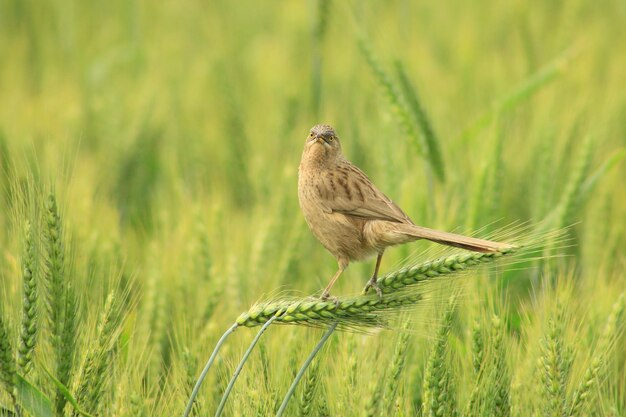

In [29]:
# Display the original uploaded image
img = cv2.imread("farm.jpg")
cv2_imshow(img)